### Project: Problem Statement - Credit Card Customer Segmentation
AllLife Credit Card Customer Segmentation
Background: AllLife Bank wants to focus on its credit card customer base in the next financial year. They have been advised by their
marketing research team, that the penetration in the market can be improved. Based on this input, the Marketing team proposes to run
personalised campaigns to target new customers as well as upsell to existing customers. Another insight from the market research was
that the customers perceive the support services of the back poorly. Based on this, the Operations team wants to upgrade the service
delivery model, to ensure that customers queries are resolved faster. Head of Marketing and Head of Delivery both decide to reach out
to the Data Science team for help.
Objective: To identify different segments in the existing customer based on their spending patterns as well as past interaction with the
bank.
### Key Questions:
1. How many different segments of customers are there?
2. How are these segments different from each other?
3. What are your recommendations to the bank on how to better market to and service these customers?

### Import libraries and dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

sns.set(color_codes=True)

In [2]:
cc_customers = pd.read_excel('Credit Card Customer Data.xlsx')

In [3]:
cc_customers.head()

,Sl_No,Customer Key,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
0,1,87073,100000,2,1,1,0
1,2,38414,50000,3,0,10,9
2,3,17341,50000,7,1,3,4
3,4,40496,30000,5,1,1,4
4,5,47437,100000,6,0,12,3


In [4]:
cc_customers.shape

(660, 7)

There are 660 rows and 7 columns.

In [5]:
cc_customers.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 660 entries, 0 to 659
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   Sl_No                660 non-null    int64
 1   Customer Key         660 non-null    int64
 2   Avg_Credit_Limit     660 non-null    int64
 3   Total_Credit_Cards   660 non-null    int64
 4   Total_visits_bank    660 non-null    int64
 5   Total_visits_online  660 non-null    int64
 6   Total_calls_made     660 non-null    int64
dtypes: int64(7)
memory usage: 36.2 KB


1. There is no null value.
2. All the variables are of int64 type.

In [6]:
customer_data = cc_customers.copy()

In [7]:
customer_data.drop(['Sl_No','Customer Key'],axis=1,inplace=True)#since serial no.,customer key are unique,lets remove them 

In [8]:
customer_data.describe().T

,count,mean,std,min,25%,50%,75%,max
Avg_Credit_Limit,660.0,34574.242424,37625.487804,3000.0,10000.0,18000.0,48000.0,200000.0
Total_Credit_Cards,660.0,4.706061,2.167835,1.0,3.0,5.0,6.0,10.0
Total_visits_bank,660.0,2.403030,1.631813,0.0,1.0,2.0,4.0,5.0
Total_visits_online,660.0,2.606061,2.935724,0.0,1.0,2.0,4.0,15.0
Total_calls_made,660.0,3.583333,2.865317,0.0,1.0,3.0,5.0,10.0


### Insights:
1. Minimun Avg_Credit_Limit is 3000 ,maximum is 200000.0.
2. Customers in this dataset have atleast 1 credit card. Maximum no. of credit cards a customer have is 10.
3. Some people never visited the bank.Maximum visit to bank is 5.
4. Some people never used online banking.Maximum no. of visits online is 15.
5. Some people never called bank for any query.Maximum no. of calls made by some people is 10.

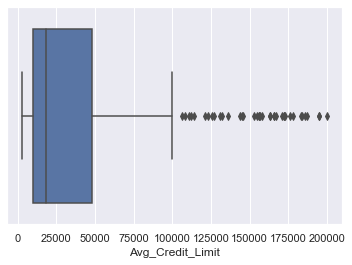

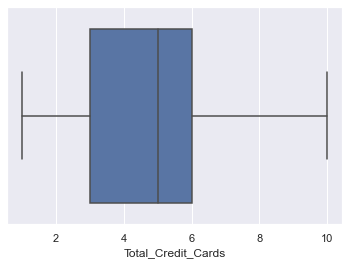

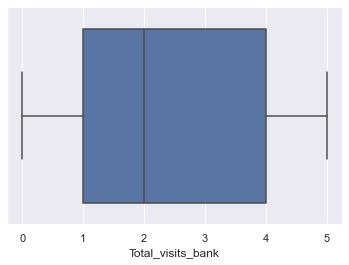

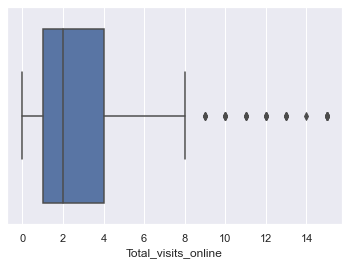

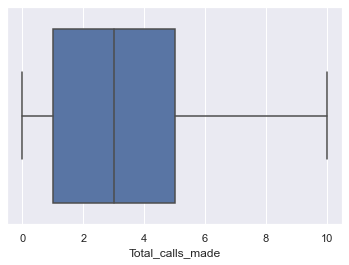

In [9]:
for i in customer_data.columns:
    sns.boxplot(customer_data[i]);
    plt.show()

1. There are outliers in Avg_Credit_Limit,Total_visits_online but those are possible values.

In [10]:
customer_data.isnull().sum() # no null values

Avg_Credit_Limit       0
Total_Credit_Cards     0
Total_visits_bank      0
Total_visits_online    0
Total_calls_made       0
dtype: int64

In [11]:
customer_data.skew()

Avg_Credit_Limit       2.202396
Total_Credit_Cards     0.144879
Total_visits_bank      0.141896
Total_visits_online    2.225607
Total_calls_made       0.658905
dtype: float64

All are right skewed with Avg_Credit_Limit, Total_visits_online most skewed.

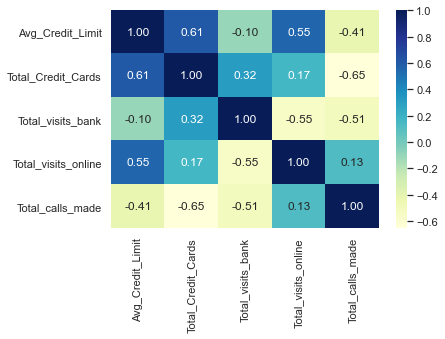

In [12]:
sns.heatmap(customer_data.corr(),annot=True,fmt='.2f',cmap='YlGnBu');

Avg_Credit_Limit is positively correlated with Total_Credit_Cards,Total_visits_online and negatively correlated to Total_visits_bank,Total_calls_made.

In [13]:
customer_data[customer_data['Avg_Credit_Limit'] > 100000].shape

(39, 5)

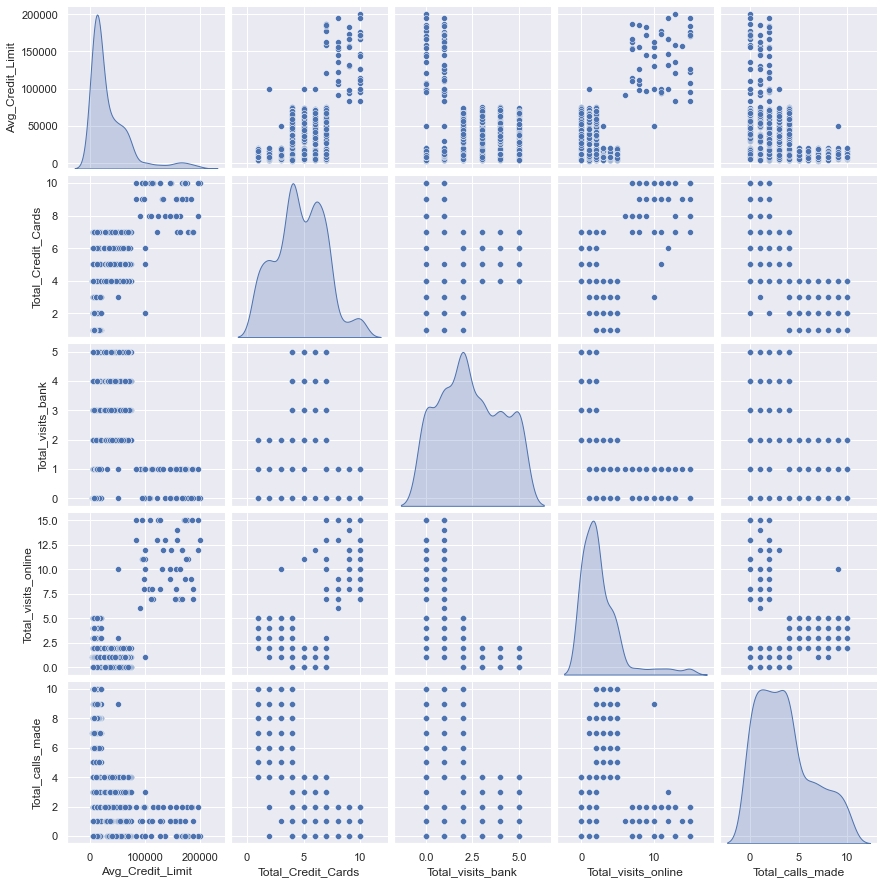

In [14]:
sns.pairplot(customer_data,diag_kind='kde');

### Insights:
1. People having credit card between 0 to 3 have Avg_Credit_Limit between 0 to 20000(or 25000 almost). If credit card no. are between 4 to 7 maximum Avg_Credit_Limit is 100000.For more than 7,Avg_Credit_Limit is more than 100000.
2. Customers with less Avg_Credit_Limit visited bank more.
3. Graph between Total_visits_online and Avg_Credit_Limit shows 2 or 3 groups. For people having Avg_Credit_Limit less than 100000 visited online 0 to 5 times and for Avg_Credit_Limit greater than 100000, online visits is between 6 to 15.
4. More calls were made by people having less Avg_Credit_Limit.
5. Based on above observatons, I think we can work with 3 groups.

In [15]:
from scipy.stats import zscore

customer_data_scaled = customer_data.apply(zscore)

### KMeans

Text(0.5, 1.0, 'Selecting k with the Elbow Method')

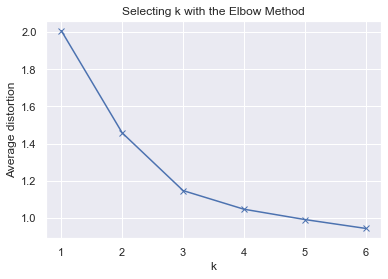

In [16]:
from sklearn.cluster import KMeans
from scipy.spatial.distance import cdist
clusters=[1,2,3,4,5,6]
meanDistortions=[]

for k in clusters:
    kmeansModel=KMeans(n_clusters=k)
    kmeansModel.fit(customer_data_scaled)
    prediction=kmeansModel.predict(customer_data_scaled)
    meanDistortions.append(sum(np.min(cdist(customer_data_scaled, kmeansModel.cluster_centers_, 'euclidean'), axis=1)) / customer_data_scaled
                           .shape[0])


plt.plot(clusters, meanDistortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Average distortion')
plt.title('Selecting k with the Elbow Method')

Let's take k=3.

In [17]:
kMeansModel = KMeans(n_clusters=3,n_init=16,random_state=7)
kMeansModel.fit(customer_data_scaled)

KMeans(n_clusters=3, n_init=16, random_state=7)

In [18]:
labels = kMeansModel.labels_
counts = np.bincount(labels[labels>=0])
print(counts)

[386 224  50]


In [19]:
centroids = kMeansModel.cluster_centers_
centroid_df = pd.DataFrame(centroids, columns = list(customer_data_scaled) )
centroid_df.transpose()

,0,1,2
Avg_Credit_Limit,-0.021062,-0.595796,2.831764
Total_Credit_Cards,0.373690,-1.059623,1.862226
Total_visits_bank,0.666395,-0.901518,-1.105763
Total_visits_online,-0.553672,0.322997,2.827319
Total_calls_made,-0.553005,1.148109,-0.874330


In [20]:
predictions = kMeansModel.predict(customer_data_scaled)
customer_data["group"] = predictions
customer_data['group'] = customer_data['group'].astype('category')

In [21]:
customer_data.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group
0,100000,2,1,1,0,0
1,50000,3,0,10,9,1
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,2
5,20000,3,0,1,8,1
6,100000,5,0,11,2,2
7,15000,3,0,1,1,1
8,5000,2,0,2,2,1
9,3000,4,0,1,7,1


In [22]:
customer_data.groupby(customer_data['group']).mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
group,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,12174.107143,2.410714,0.933036,3.553571,6.870536
2,141040.000000,8.740000,0.600000,10.900000,1.080000


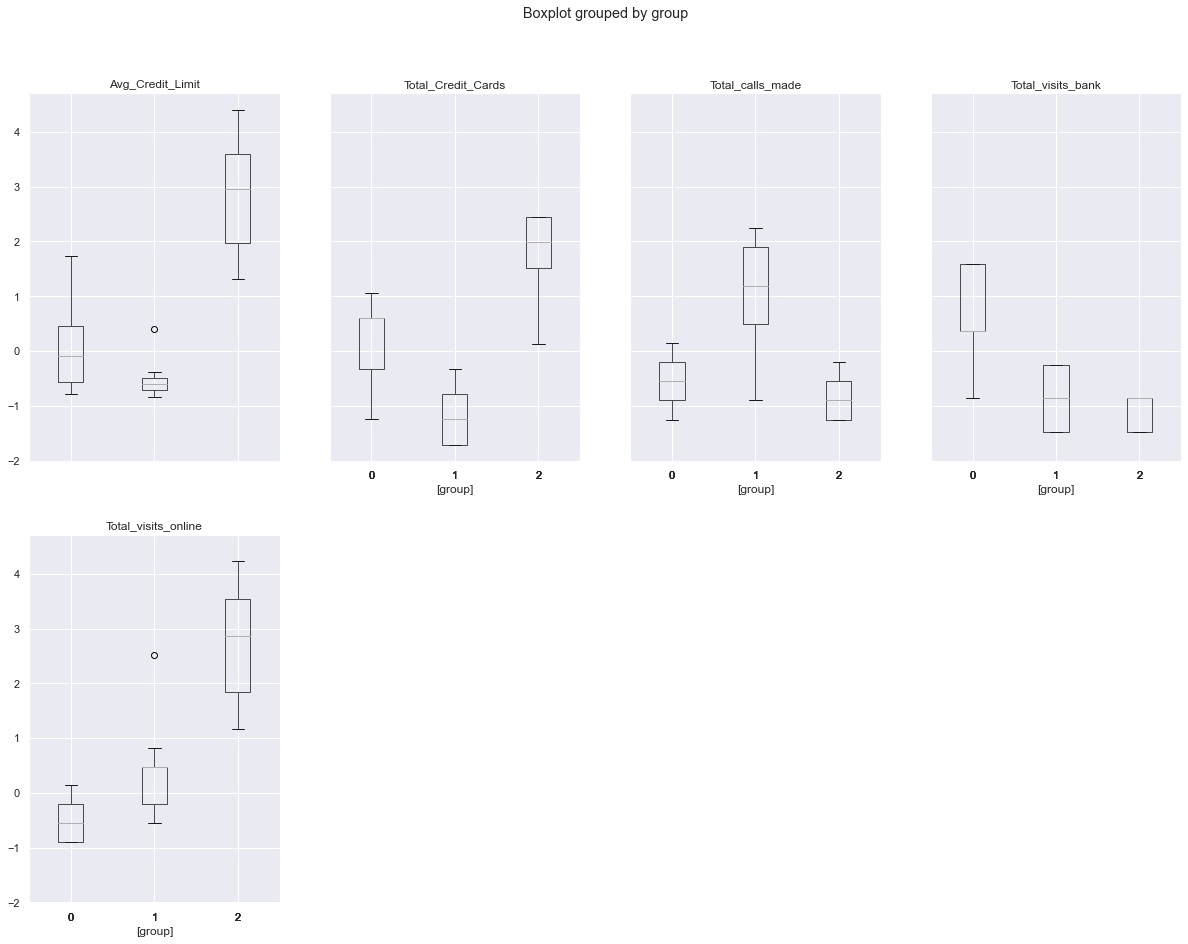

In [23]:
customer_data_scaled["group"] = predictions
customer_data_scaled.boxplot(by = 'group',  layout=(2,4), figsize=(20, 15));

### Hierarchical clustering

In [24]:
from scipy.cluster.hierarchy import cophenet, dendrogram, linkage
from scipy.spatial.distance import pdist  

Z = linkage(customer_data_scaled, metric='euclidean', method='average')
c, coph_dists = cophenet(Z , pdist(customer_data_scaled))

c

0.9168725782090766

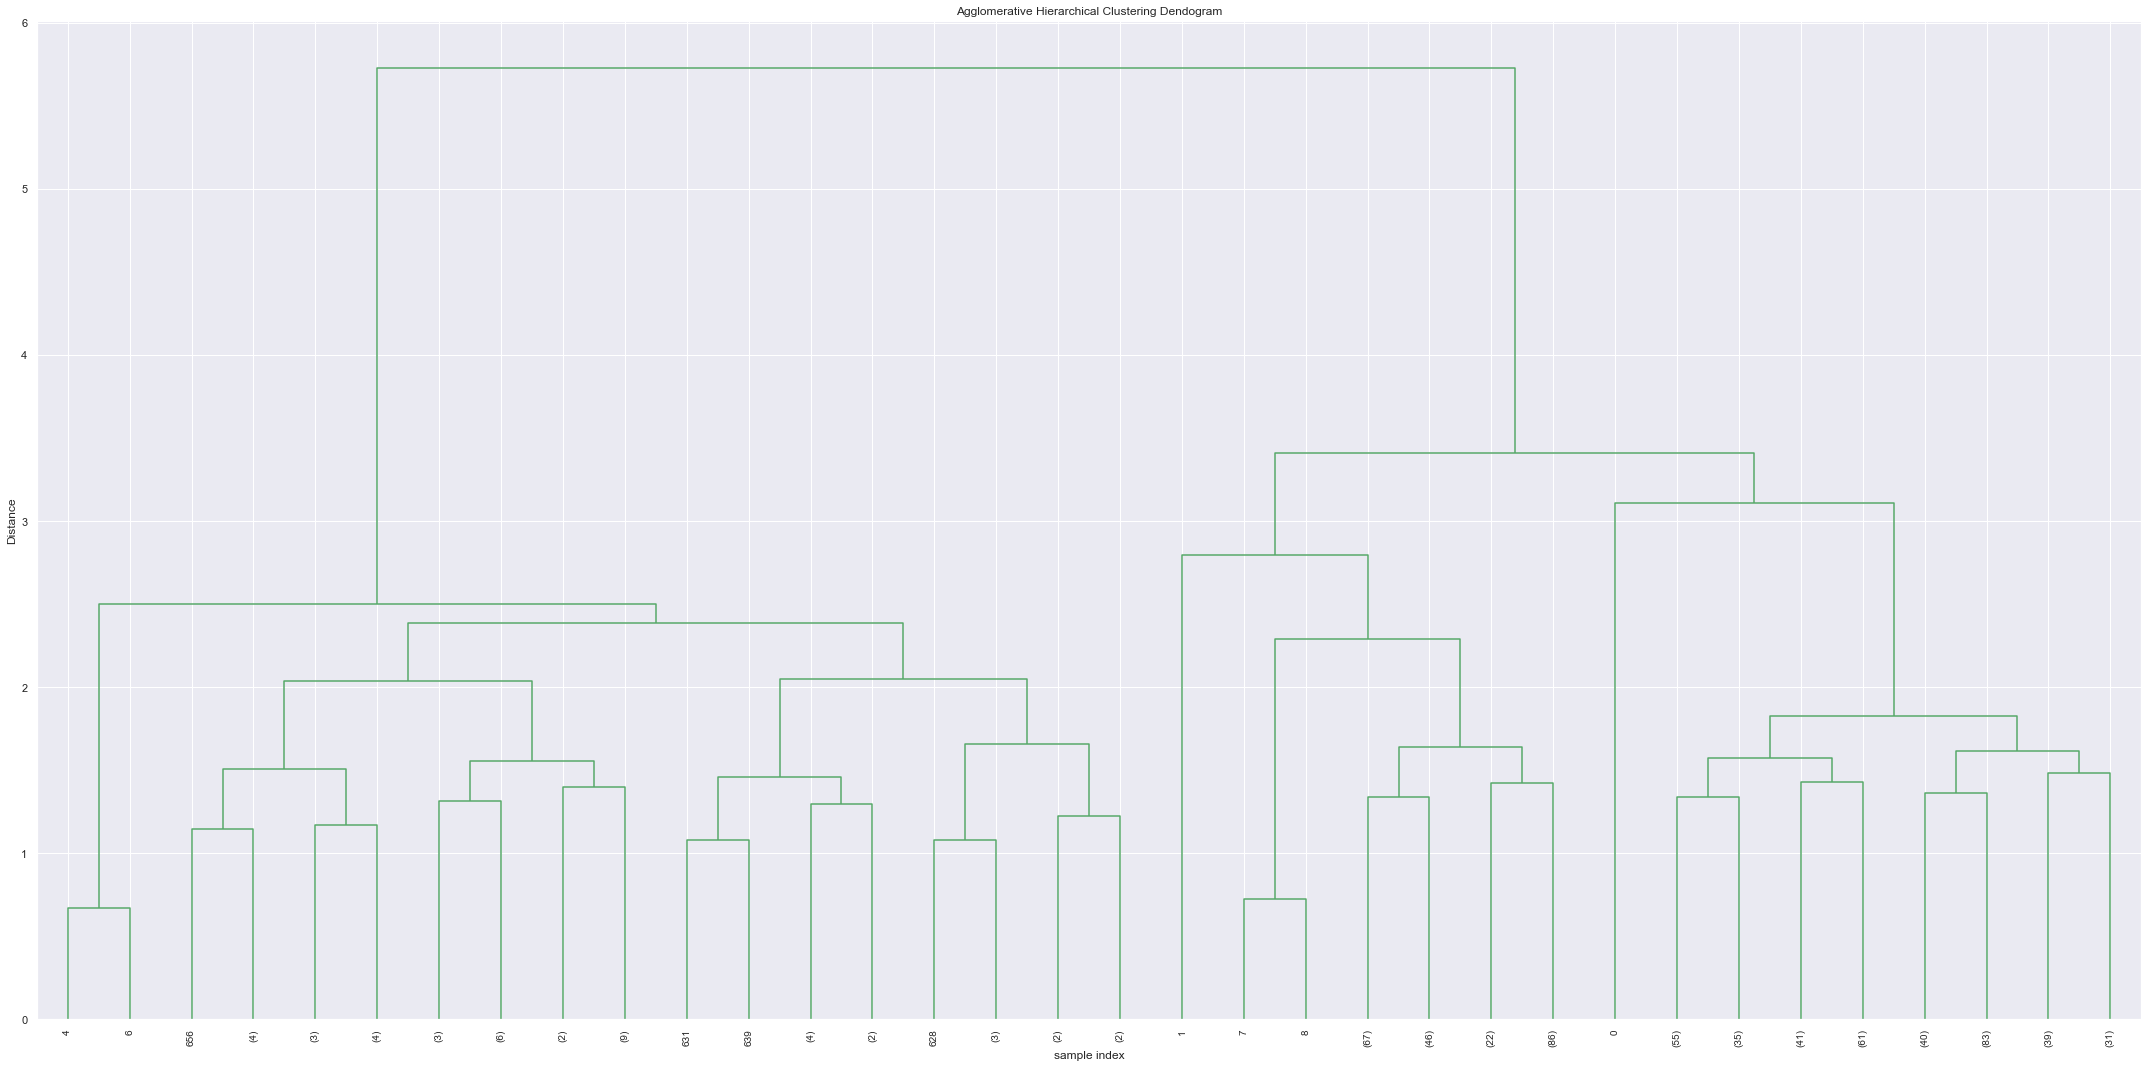

In [25]:
plt.figure(figsize=(30, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.0,p=5,color_threshold = 40, leaf_font_size=10 ,truncate_mode='level')
plt.tight_layout()

In [26]:
Z = linkage(customer_data_scaled, metric='euclidean', method='complete')
c, coph_dists = cophenet(Z , pdist(customer_data_scaled))

c

0.8860521900934342

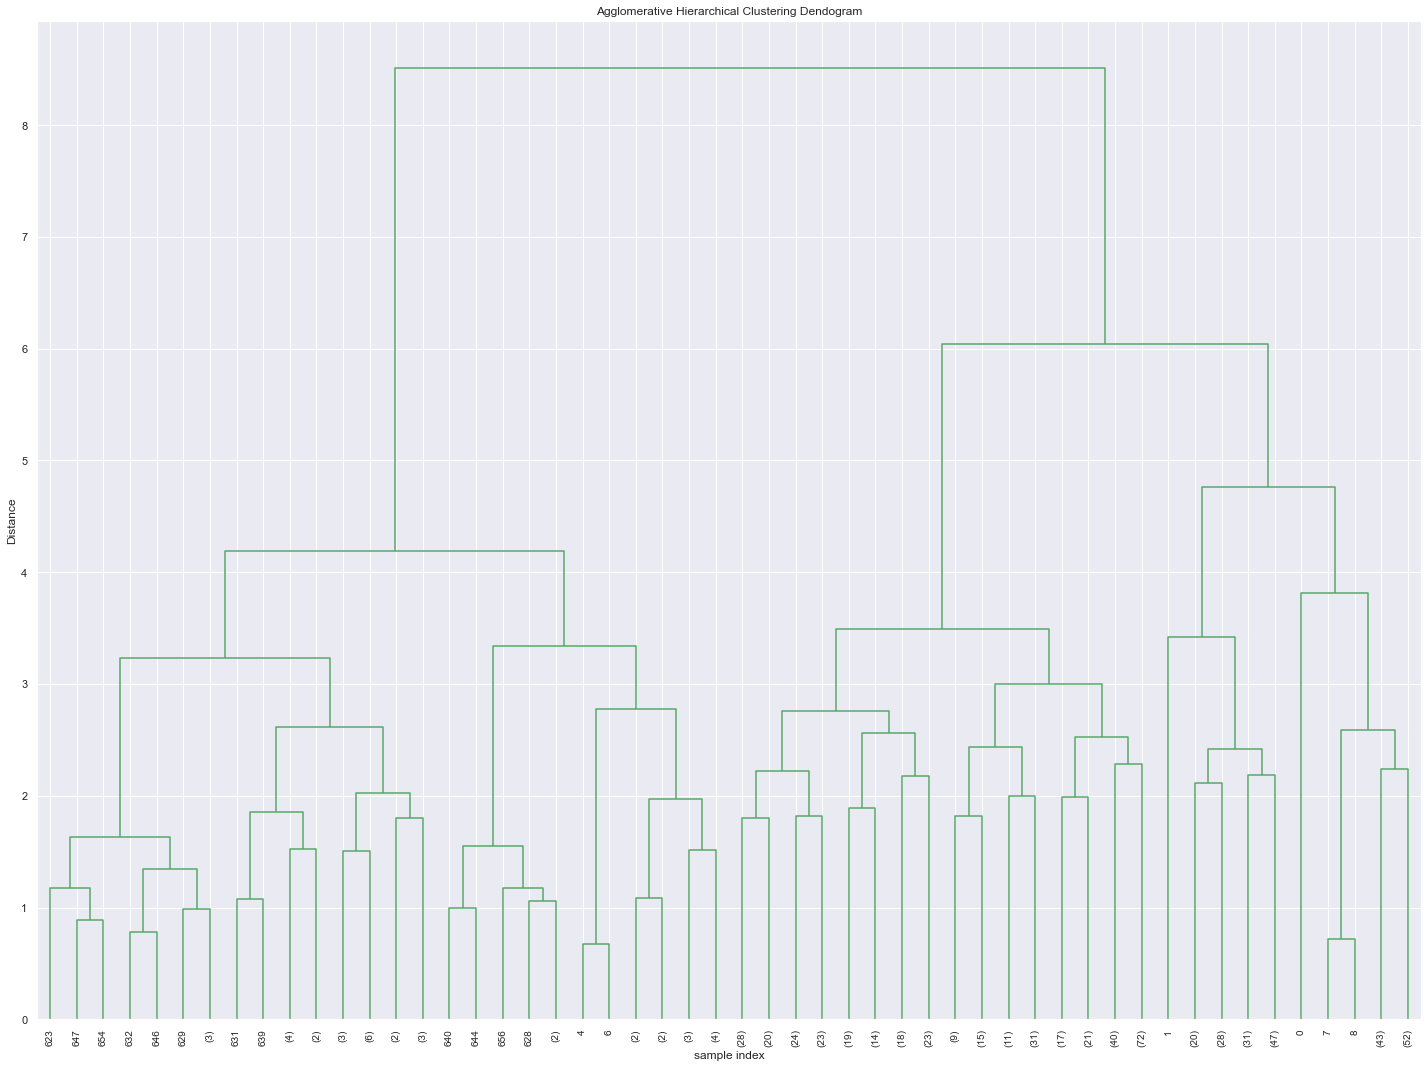

In [27]:
plt.figure(figsize=(20, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.0,p=5,color_threshold = 40, leaf_font_size=10 ,truncate_mode='level')
plt.tight_layout()

In [28]:
Z = linkage(customer_data_scaled, metric='euclidean', method='centroid')
c, coph_dists = cophenet(Z , pdist(customer_data_scaled))

c

0.9134704636213649

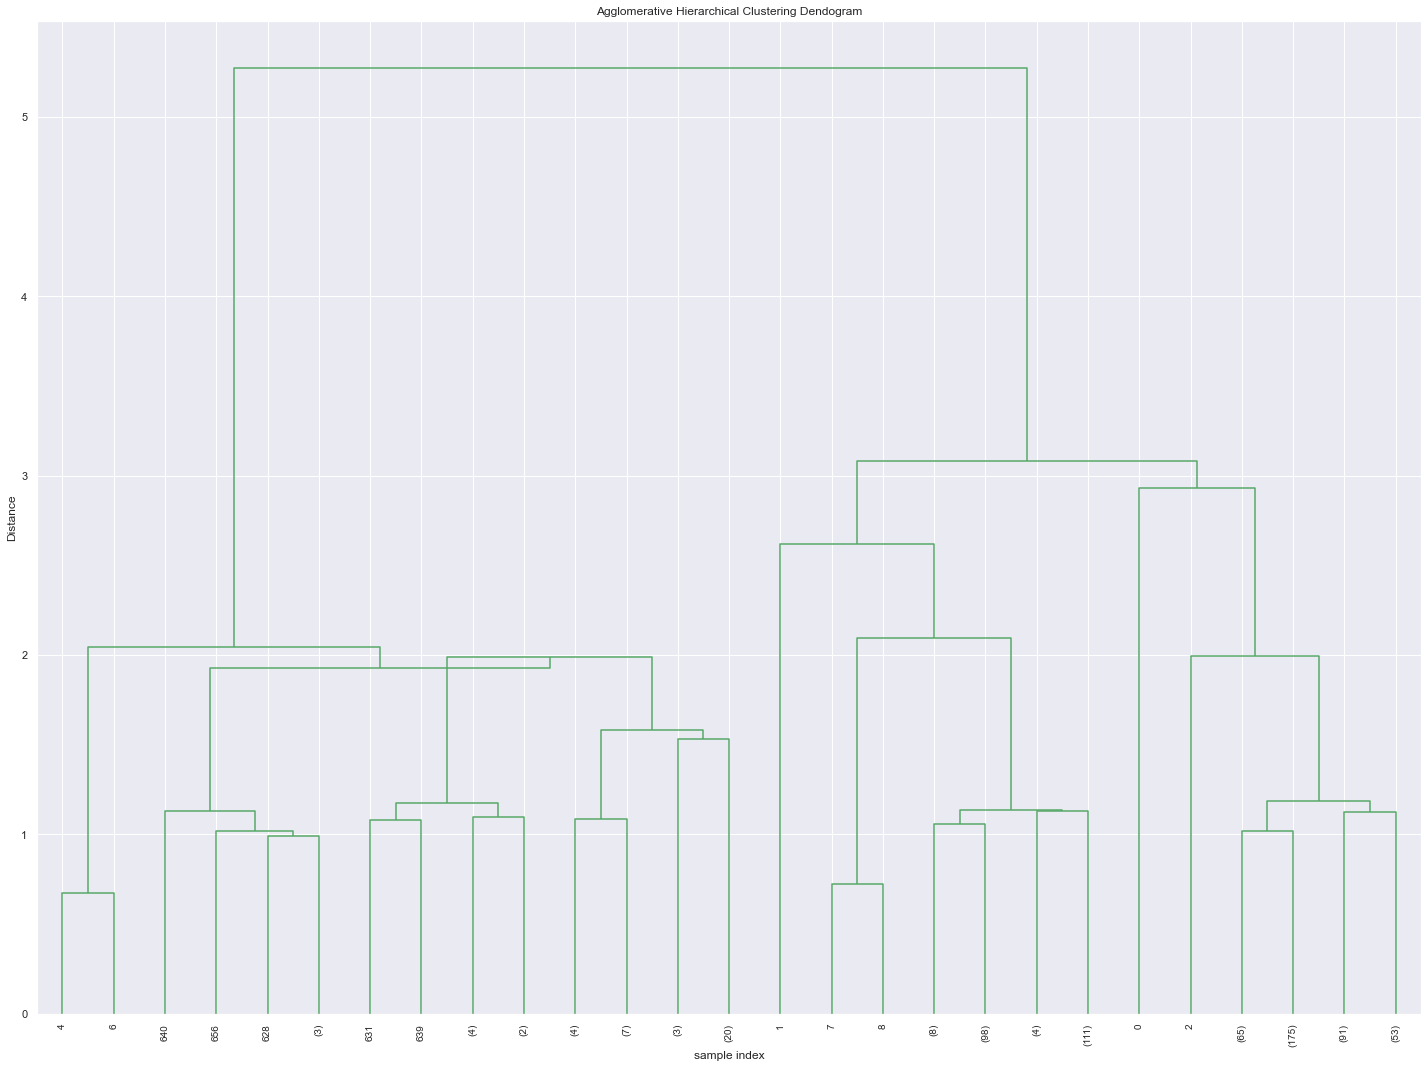

In [29]:
plt.figure(figsize=(20, 15))
plt.title('Agglomerative Hierarchical Clustering Dendogram')
plt.xlabel('sample index')
plt.ylabel('Distance')
dendrogram(Z, leaf_rotation=90.0,p=5,color_threshold = 52, leaf_font_size=10 ,truncate_mode='level')
plt.tight_layout()

Average linkage method is giving best results.
Lets take 3 clusters.

In [30]:
from sklearn.cluster import AgglomerativeClustering

cluster_model = AgglomerativeClustering(n_clusters=3, affinity='euclidean',  linkage='average')
cluster_model.fit(customer_data_scaled)

AgglomerativeClustering(linkage='average', n_clusters=3)

In [31]:
customer_data1 = cc_customers.copy()
customer_data1.drop(['Sl_No','Customer Key'],axis=1,inplace=True)

In [32]:
customer_data1['group'] = cluster_model.labels_
customer_data1.head(10)

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made,group
0,100000,2,1,1,0,0
1,50000,3,0,10,9,2
2,50000,7,1,3,4,0
3,30000,5,1,1,4,0
4,100000,6,0,12,3,1
5,20000,3,0,1,8,2
6,100000,5,0,11,2,1
7,15000,3,0,1,1,2
8,5000,2,0,2,2,2
9,3000,4,0,1,7,2


In [33]:
custDataClust = customer_data1.groupby(['group'])
custDataClust.mean()

,Avg_Credit_Limit,Total_Credit_Cards,Total_visits_bank,Total_visits_online,Total_calls_made
group,,,,,
0,33782.383420,5.515544,3.489637,0.981865,2.000000
1,141040.000000,8.740000,0.600000,10.900000,1.080000
2,12174.107143,2.410714,0.933036,3.553571,6.870536


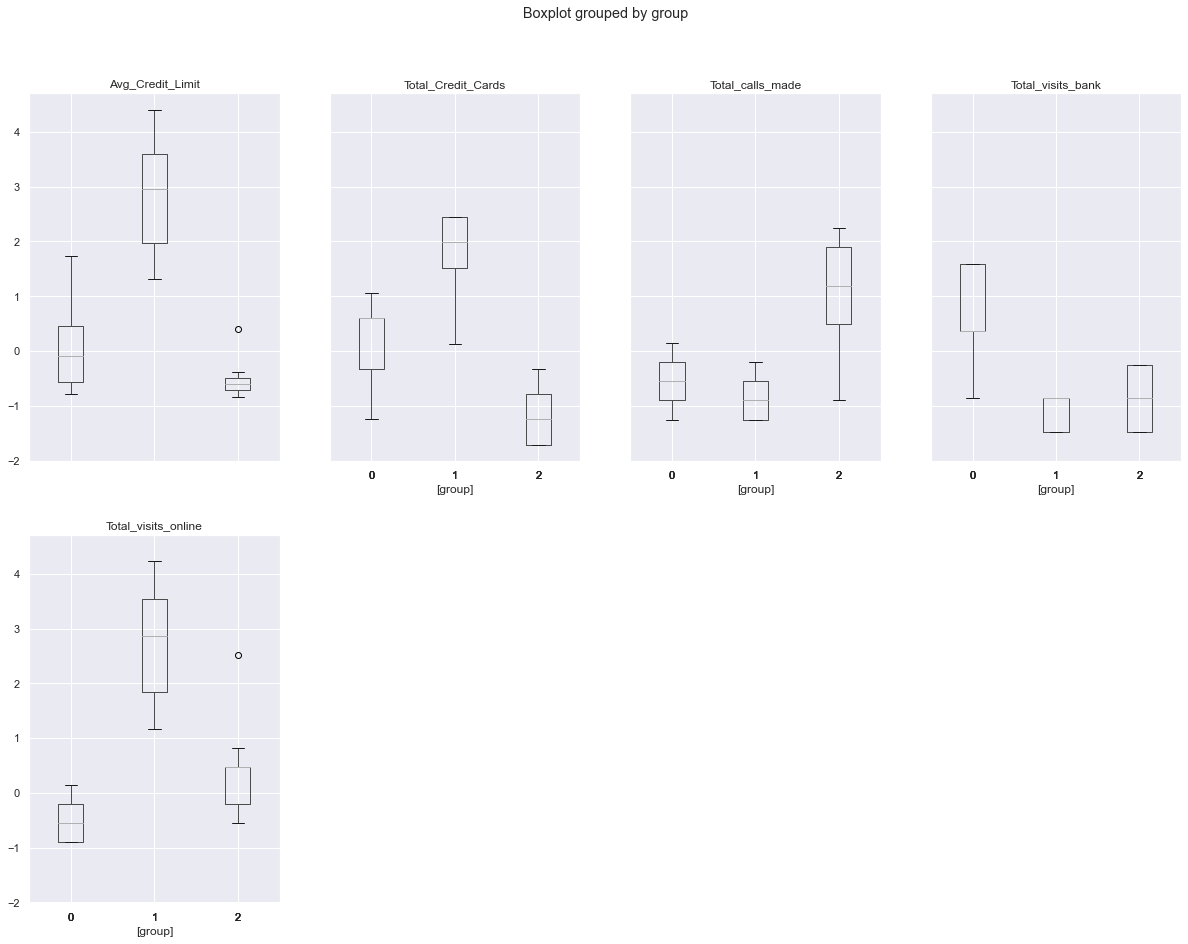

In [34]:
customer_data_scaled1 = customer_data1.apply(zscore)
customer_data_scaled1["group"] = cluster_model.labels_
customer_data_scaled1.boxplot(by = 'group',  layout=(2,4), figsize=(20, 15));

### Silhoutte Score

In [35]:
from sklearn.metrics import silhouette_score

In [36]:
 
clusters=range(2,6)
for k in clusters:
    kmeansModel=KMeans(n_clusters=k)
    kmeansModel.fit(customer_data_scaled)
    prediction=kmeansModel.predict(customer_data_scaled)
    score = silhouette_score(customer_data_scaled, prediction)
    print("For n_clusters = {}, silhouette score using KMeans is {})".format(k, score))

For n_clusters = 2, silhouette score using KMeans is 0.43418833714796445)
For n_clusters = 3, silhouette score using KMeans is 0.5411228112448502)
For n_clusters = 4, silhouette score using KMeans is 0.36885590325418505)
For n_clusters = 5, silhouette score using KMeans is 0.27664876307197045)


In [37]:
clusters=range(2,6)
for k in clusters:
    clusterModel=AgglomerativeClustering(n_clusters=k)
    prediction = clusterModel.fit_predict(customer_data_scaled1)
    score = silhouette_score(customer_data_scaled1, prediction)
    print("For n_clusters = {}, silhouette score using Agglomerative clustering is {})".format(k, score))

For n_clusters = 2, silhouette score using Agglomerative clustering is 0.4975565044968872)
For n_clusters = 3, silhouette score using Agglomerative clustering is 0.5908634951401681)
For n_clusters = 4, silhouette score using Agglomerative clustering is 0.37975510117435674)
For n_clusters = 5, silhouette score using Agglomerative clustering is 0.258388415732617)


From silhoutte score we observe that for n_clusters =3 , it is giving us good results as compared to others.

### Comparision between KMeans and Agglomerative clustering:
1. Silhouette score calculated for both methods gives us almost same results. 
2. Both the methods are giving us same results with the difference in group number only. I mean group 0 is same in both, group 1 in KMeans is group 2 in Agglomerative clustering and group 2 in KMeans is group 1 in Agglomerative clustering.

### Answer to Key questions(using KMeans boxplot):

1. There are 3 segments of customers.
2. Analysis of groups:
    1.  Group 0 : has least Avg_Credit_Limit/less no. of credit cards.
    2.  Group 0 : made most calls to bank.
    3.  Group 0 : visited bank less than Group 1 and more than Group 2.
    4.  Group 0 : visited online more than Group 1 but less than Group 2.
    5.  Group 1 : has more no. of credit cards(and hence more Avg_Credit_Limit) then Group 0 but less than Group 2.
    6.  Group 1 : calls made to bank are more than Group 2 and less than Group 0.
    7.  Group 1 : has visited the bank most.
    8.  Group 1: visited online least.
    9.  Group 2 : has most no. of credit cards(and hence Avg_Credit_Limit).
    10. Group 2 : They made least calls to the bank.
    11. Group 2 : They least visited the bank.
    12. Group 2 : They most visited online.
3. To improve the market bank should focus on Group 0 and to improve their services they should focus on Group 1.

In [38]:
df = pd.DataFrame(columns=['KmeansGroup','cluster'])
df['KmeansGroup'] = customer_data['group']
df['cluster'] = customer_data1['group']
df1 = df[df['KmeansGroup'] != df['cluster']]
df1.head(40)

,KmeansGroup,cluster
1,1,2
4,2,1
5,1,2
6,2,1
7,1,2
8,1,2
9,1,2
10,1,2
11,1,2
12,1,2


In [39]:
df2 = df[df['KmeansGroup'] == df['cluster']]
df2.head(10)

,KmeansGroup,cluster
0,0,0
2,0,0
3,0,0
228,0,0
229,0,0
230,0,0
231,0,0
232,0,0
233,0,0
234,0,0
